In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ./drive/MyDrive/최애림/cakd7/m9_딥러닝/3차 프로젝트/5팀(윤정준, 최애림, 진청아, 이정현a)/코드

# %cd ./drive/MyDrive/5팀(윤정준, 최애림, 진청아, 이정현a)/코드
# %cd ./drive/MyDrive/cakd7/3차프로젝트_dl_1025_1128/5팀\(윤정준,\ 최애림,\ 진청아,\ 이정현a\)/코드

/content/drive/.shortcut-targets-by-id/1niQkF2oFYkuV2aahMfHbpa3kXs5yrcAd/5팀(윤정준, 최애림, 진청아, 이정현a)/코드


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1niQkF2oFYkuV2aahMfHbpa3kXs5yrcAd/5팀(윤정준, 최애림, 진청아, 이정현a)/코드




```
# 코드로 형식 지정됨
```

# Otsu Threshold를 활용한 배경 제거

## Test

In [ ]:
import numpy as np
import cv2
import os
import numpy 
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

In [ ]:
# 경로 지정

slide_dirs = './train_imgs/'
mask_dirs = './train_masks/'

slide_paths = [slide_dirs + slide_img for slide_img in os.listdir(slide_dirs)]
mask_paths = [mask_dirs + mask_img for mask_img in os.listdir(slide_dirs)]

print(slide_paths[:2])
print(mask_paths[:2])

['./train_imgs/BC_01_0001.png', './train_imgs/BC_01_0002.png']
['./train_masks/BC_01_0001.png', './train_masks/BC_01_0002.png']


In [ ]:
slide_img = cv2.imread(slide_paths[9])
slide_img_gray = cv2.cvtColor(slide_img, cv2.COLOR_BGR2GRAY)

binary = slide_img_gray < 255  
    ## white = 255 이므로, 배경 구분을 위한 임곗값 설정

slide4_not_white = slide_img_gray[binary]  # white = 255
    ## 배경 부분 있는지 확인: 첫번째 사진에서는 배경 아예 없음

thresh = threshold_otsu(slide4_not_white) # otsu 사용
    ## otsu로 조직과 배경 경계 구분 임곗값 확인

print(f'임곗값 확인 : {thresh}')

임곗값 확인 : 219


In [ ]:
slide_img_gray_otsu = np.where(slide_img_gray > thresh, 255, slide_img_gray)
print(set(slide_img_gray_otsu.reshape(-1).tolist()))

{7, 8, 10, 16, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 255}


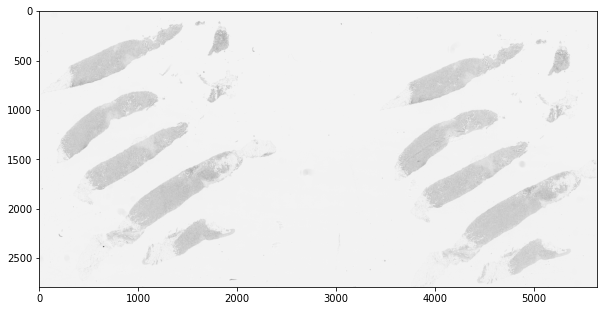

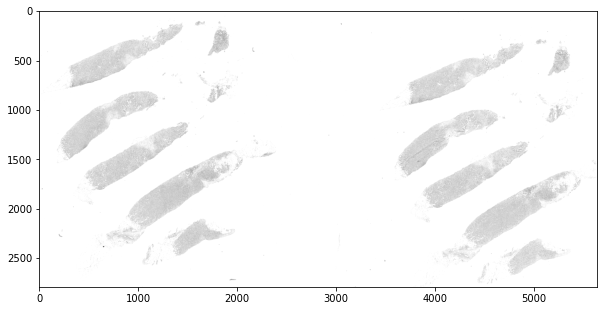

In [ ]:
plt.figure(figsize = (10,20))
plt.imshow(slide_img_gray, cmap = 'gray')
plt.figure(figsize = (10,20))
plt.imshow(slide_img_gray_otsu, cmap = 'gray')

In [ ]:
slide_img_gray_otsu

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

(2789, 5643, 3)
(2789, 5643, 3)
(2789, 5643)


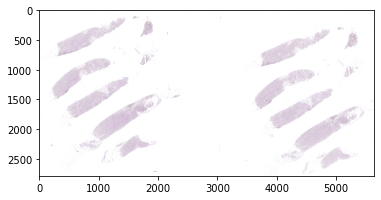

In [ ]:
rows, cols, _ = slide_img.shape
print(slide_img.shape)
slide_img_otsu = np.full((rows, cols, 3), 255)
print(slide_img_otsu.shape)

print(slide_img_gray_otsu.shape)

for row in range(rows):
  for col in range(cols):
    if slide_img_gray_otsu[row, col] != 255:
       slide_img_otsu[row, col,] = slide_img[row, col,]

plt.imshow(slide_img_otsu)

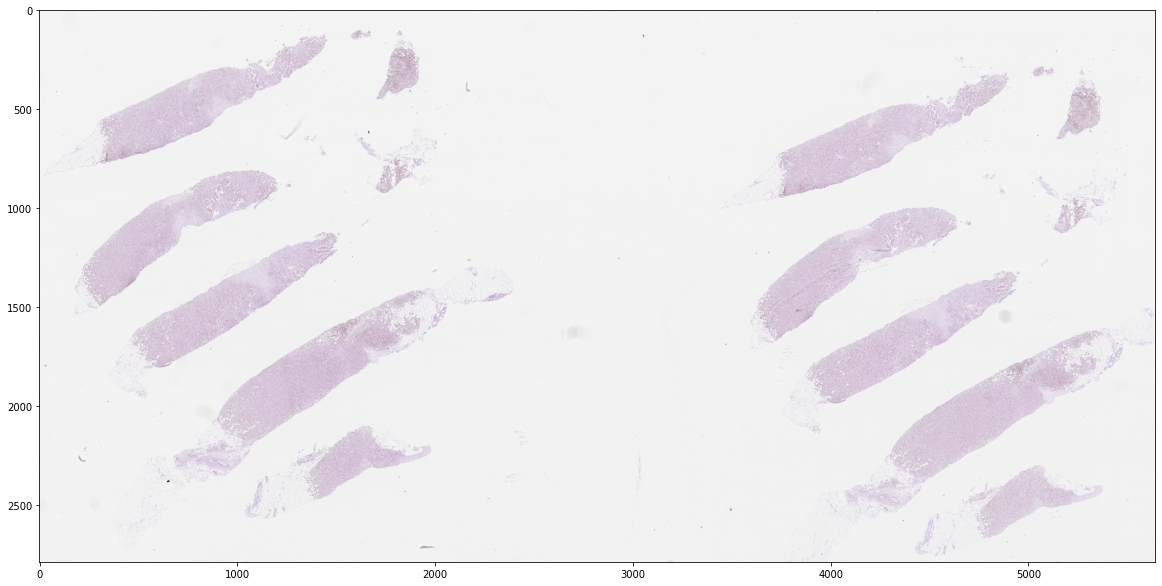

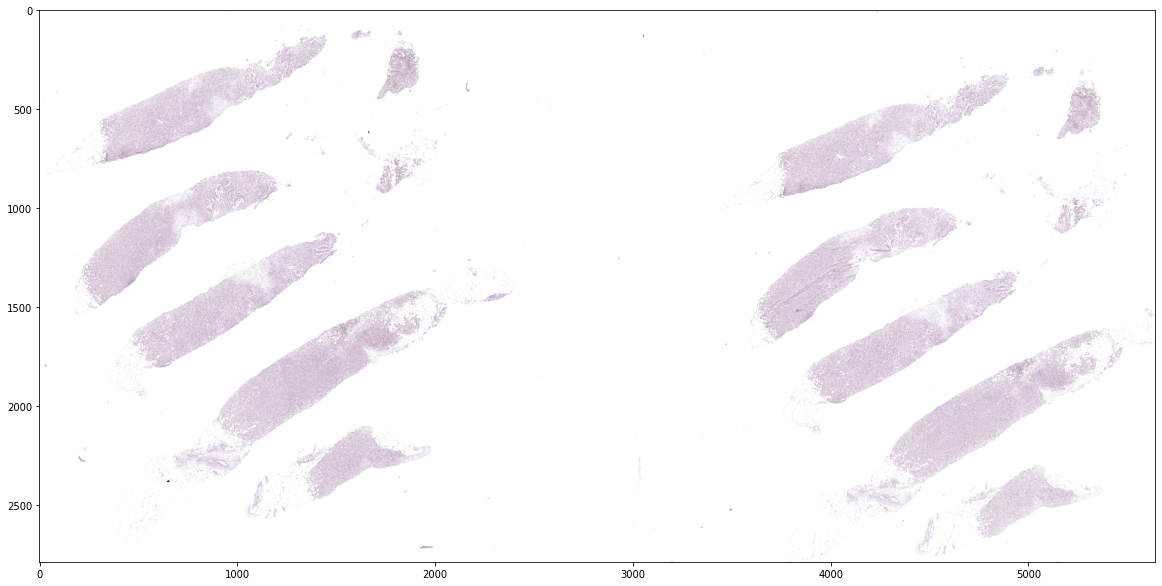

In [ ]:
import time
plt.figure(figsize = (20,30))
plt.imshow(slide_img)
plt.show(block=False)
plt.pause(1)
plt.close()

plt.figure(figsize = (20,30))
plt.imshow(slide_img_otsu)

## 전체 실행

### 필요모듈 임포트

In [1]:
import numpy as np
import cv2
import os
import numpy 
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

### 사용자함수 생성

#### Train

In [ ]:
def img_remove_background(path):
  # 이미지 배열로 불러오기
  slide_img = cv2.imread(path)

  # otsu 임곗값 계산을 위해 grayscale로 배열 불러오기
  slide_img_gray = cv2.imread(path, 0)

  # 혹시나 있을지 모르는 흰색 배경 확인
  binary = slide_img_gray < 255 
      ## white = 255 이므로, 배경 구분을 위한 임곗값 설정
  slide_not_white = slide_img_gray[binary]  # white = 255
      ## 배경 부분 있는지 확인: 첫번째 사진에서는 배경 아예 없음

  thresh = threshold_otsu(slide_not_white) 
      ## otsu로 조직과 배경 경계 구분 임곗값 확인
  print(f'임곗값 확인 : {thresh}')

  # 임곗값보다 크면 흰색 픽셀값(255)으로 변경
  slide_img_gray_otsu = np.where(slide_img_gray > thresh, 255, slide_img_gray)

  # 행, 열 shape 확인
  rows, cols, _ = slide_img.shape
  print(f'원본 사이즈:{slide_img.shape}')

  # 배경이 아닌 조직부분의 rgb 픽셀값을 담을 배열 생성
  slide_img_otsu = np.full((rows, cols, 3), 255)

  # otsu 임곗값으로 구분된 배열 내 흰색이 아닌부분만 추출
  for row in range(rows):
    for col in range(cols):
      if slide_img_gray_otsu[row, col] != 255:
        slide_img_otsu[row, col, 0] = slide_img[row, col,2]
        slide_img_otsu[row, col, 1] = slide_img[row, col,1]
        slide_img_otsu[row, col, 2] = slide_img[row, col,0]
  
  return slide_img_otsu

def save_img(path, want_split, save_path, array_img):
  # 저장될 파일 이름 생성
  save_filename = path.split(want_split)[1]   # 'train_imgs/'
  
  # 이미지파일 저장하기
  array_img = array_img.astype('uint8')
  plt.imsave(f'{save_path}{save_filename}', array_img) # './train_imgs_otsu/'

  print(f'{save_filename} 파일이 저장되었습니다.')

In [ ]:
slide_dirs = './train_imgs/'

slide_paths = [slide_dirs + slide_img for slide_img in sorted(os.listdir(slide_dirs))]

# 확인차
print(slide_paths[:10])

['./train_imgs/BC_01_0001.png', './train_imgs/BC_01_0002.png', './train_imgs/BC_01_0003.png', './train_imgs/BC_01_0004.png', './train_imgs/BC_01_0005.png', './train_imgs/BC_01_0006.png', './train_imgs/BC_01_0007.png', './train_imgs/BC_01_0008.png', './train_imgs/BC_01_0009.png', './train_imgs/BC_01_0010.png']


### 사용자함수 실행 및 저장

In [ ]:
for path in slide_paths:
  slide_img_otsu = img_remove_background(path)
  save_img(path, want_split = 'train_imgs/', save_path = './train_imgs_otsu/', array_img = slide_img_otsu)

임곗값 확인 : 189
원본 사이즈:(3003, 6141, 3)
BC_01_0001.png 파일이 저장되었습니다.
임곗값 확인 : 210
원본 사이즈:(2687, 5975, 3)
BC_01_0002.png 파일이 저장되었습니다.
임곗값 확인 : 193
원본 사이즈:(3181, 5975, 3)
BC_01_0003.png 파일이 저장되었습니다.
임곗값 확인 : 189
원본 사이즈:(2810, 5809, 3)
BC_01_0004.png 파일이 저장되었습니다.
임곗값 확인 : 216
원본 사이즈:(2905, 5311, 3)
BC_01_0005.png 파일이 저장되었습니다.
임곗값 확인 : 200
원본 사이즈:(2591, 5975, 3)
BC_01_0006.png 파일이 저장되었습니다.
임곗값 확인 : 191
원본 사이즈:(3755, 4813, 3)
BC_01_0007.png 파일이 저장되었습니다.
임곗값 확인 : 207
원본 사이즈:(2523, 5975, 3)
BC_01_0008.png 파일이 저장되었습니다.
임곗값 확인 : 219
원본 사이즈:(2789, 5643, 3)
BC_01_0009.png 파일이 저장되었습니다.
임곗값 확인 : 202
원본 사이즈:(2317, 5975, 3)
BC_01_0010.png 파일이 저장되었습니다.
임곗값 확인 : 206
원본 사이즈:(2927, 5809, 3)
BC_01_0012.png 파일이 저장되었습니다.
임곗값 확인 : 208
원본 사이즈:(2734, 5477, 3)
BC_01_0013.png 파일이 저장되었습니다.
임곗값 확인 : 203
원본 사이즈:(2021, 5809, 3)
BC_01_0014.png 파일이 저장되었습니다.
임곗값 확인 : 206
원본 사이즈:(2308, 5311, 3)
BC_01_0015.png 파일이 저장되었습니다.
임곗값 확인 : 208
원본 사이즈:(2559, 6640, 3)
BC_01_0062.png 파일이 저장되었습니다.
임곗값 확인 : 189
원본 사이즈:(1347, 4813, 3)
BC_0

#### Test

In [ ]:
slide_dirs = './test_imgs/'

slide_paths = [slide_dirs + slide_img for slide_img in sorted(os.listdir(slide_dirs))]

# 확인차
print(slide_paths[:10])

['./test_imgs/BC_01_0011.png', './test_imgs/BC_01_0220.png', './test_imgs/BC_01_0233.png', './test_imgs/BC_01_0258.png', './test_imgs/BC_01_0260.png', './test_imgs/BC_01_0266.png', './test_imgs/BC_01_0269.png', './test_imgs/BC_01_0272.png', './test_imgs/BC_01_0275.png', './test_imgs/BC_01_0278.png']


In [ ]:
# 저장 디렉토리 생성

import os
os.mkdir('./test_imgs_otsu')

In [ ]:
# for문을 활용해 전체 test 데이터 배경 제거

for path in slide_paths:
  slide_img_otsu = img_remove_background(path)
  save_img(path, want_split = 'test_imgs/', save_path = './test_imgs_otsu/', array_img = slide_img_otsu)

임곗값 확인 : 205
원본 사이즈:(2811, 6141, 3)
BC_01_0011.png 파일이 저장되었습니다.
임곗값 확인 : 204
원본 사이즈:(2075, 5311, 3)
BC_01_0220.png 파일이 저장되었습니다.
임곗값 확인 : 208
원본 사이즈:(3941, 5311, 3)
BC_01_0233.png 파일이 저장되었습니다.
임곗값 확인 : 209
원본 사이즈:(2795, 5311, 3)
BC_01_0258.png 파일이 저장되었습니다.
임곗값 확인 : 202
원본 사이즈:(3296, 5477, 3)
BC_01_0260.png 파일이 저장되었습니다.
임곗값 확인 : 210
원본 사이즈:(3063, 5477, 3)
BC_01_0266.png 파일이 저장되었습니다.
임곗값 확인 : 212
원본 사이즈:(3160, 5975, 3)
BC_01_0269.png 파일이 저장되었습니다.
임곗값 확인 : 209
원본 사이즈:(2145, 5809, 3)
BC_01_0272.png 파일이 저장되었습니다.
임곗값 확인 : 201
원본 사이즈:(3400, 5809, 3)
BC_01_0275.png 파일이 저장되었습니다.
임곗값 확인 : 205
원본 사이즈:(2274, 5477, 3)
BC_01_0278.png 파일이 저장되었습니다.
임곗값 확인 : 206
원본 사이즈:(2694, 5975, 3)
BC_01_0279.png 파일이 저장되었습니다.
임곗값 확인 : 200
원본 사이즈:(2694, 5975, 3)
BC_01_0286.png 파일이 저장되었습니다.
임곗값 확인 : 204
원본 사이즈:(3160, 5643, 3)
BC_01_0296.png 파일이 저장되었습니다.
임곗값 확인 : 210
원본 사이즈:(2328, 4979, 3)
BC_01_0303.png 파일이 저장되었습니다.
임곗값 확인 : 219
원본 사이즈:(1996, 6640, 3)
BC_01_0310.png 파일이 저장되었습니다.
임곗값 확인 : 206
원본 사이즈:(2748, 5809, 3)
BC_0